# Setup

In [37]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.0)

# Load and Prepare Data

In [40]:
vudenc_stripped = Path("C:/Projects/graphsec-detector/datasets/vudenc/raw/vudenc_stripped.jsonl")
vudenc_patched = Path("C:/Projects/graphsec-detector/datasets/vudenc/raw/vudenc_patched.jsonl")

with open(vudenc_stripped, "r") as f:
    stripped_data = [json.loads(line) for line in f]

df_stripped = pd.DataFrame(stripped_data)

with open(vudenc_patched, "r") as f:
    patched_data = [json.loads(line) for line in f]

df_patched = pd.DataFrame(patched_data)

# Vulnerability Distribution

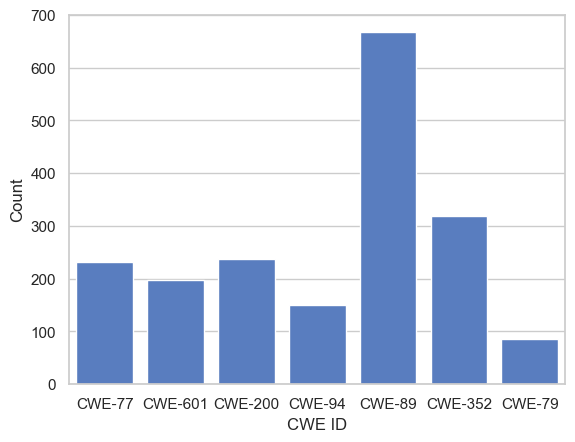

In [ ]:
ax = sns.countplot(data=df_stripped, x="cwe_id")
ax.set(xlabel="CWE ID", ylabel="Count")
plt.show()

# Number of files changed per commit

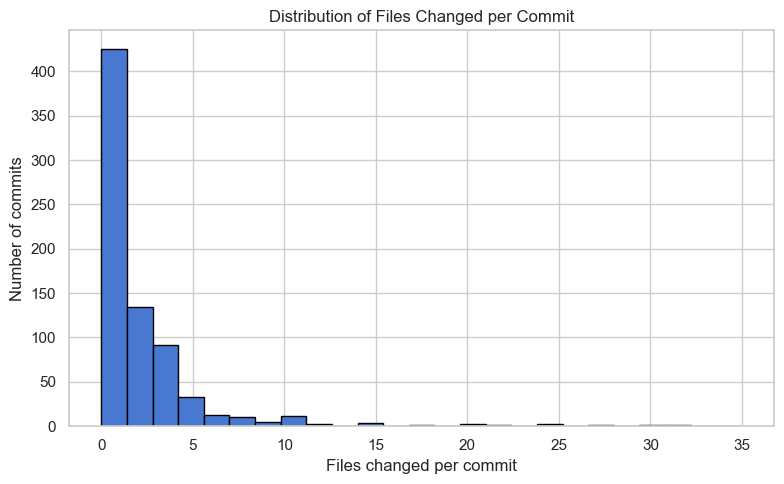

In [42]:
import matplotlib.pyplot as plt

ax = df_stripped["commit"].value_counts().hist(
    bins=25,
    range=(0, 35),
    edgecolor='black',
    figsize=(8, 5)
)

ax.set_xlabel("Files changed per commit")
ax.set_ylabel("Number of commits")
ax.set_title("Distribution of Files Changed per Commit")

plt.tight_layout()
plt.show()



# Compute metrics for Patched Code

In [45]:
df_patched["raw_source_len"] = df_patched["source"].apply(lambda x: len(str(x).splitlines()))
df_patched["raw_patch_len"] = df_patched["new_code"].apply(lambda x: len(str(x).splitlines()))
df_patched["patch_size"] = df_patched["raw_patch_len"] - df_patched["raw_source_len"]
df_patched["source_tokens"] = df_patched["source"].apply(lambda x: len(str(x).split()))
df_patched["patch_tokens"] = df_patched["new_code"].apply(lambda x: len(str(x).split()))

# Source vs. Patched Line COunt

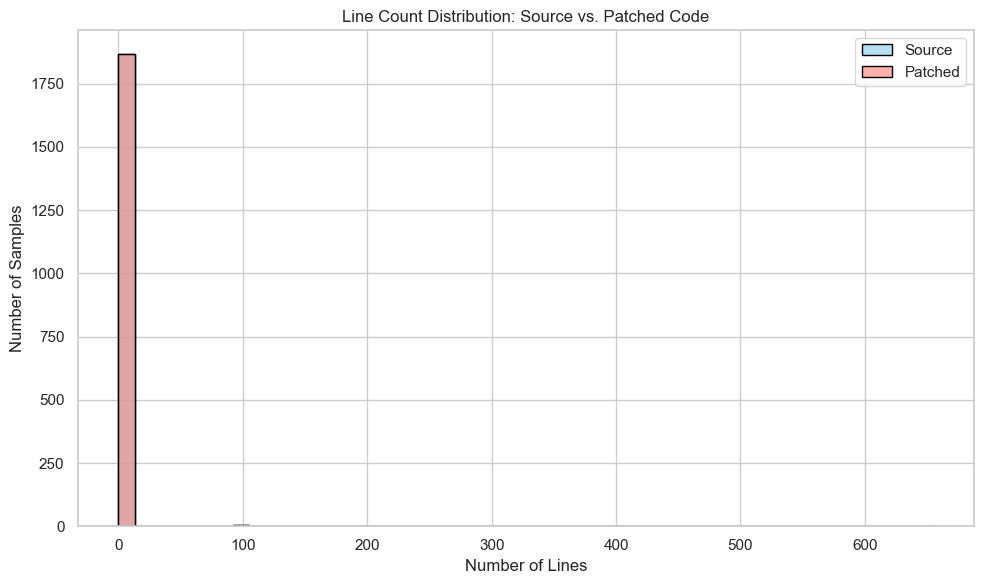

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df_patched["raw_source_len"], bins=50, label="Source", color="skyblue", edgecolor="black", alpha=0.6)
sns.histplot(df_patched["raw_patch_len"], bins=50, label="Patched", color="salmon", edgecolor="black", alpha=0.6)
plt.xlabel("Number of Lines")
plt.ylabel("Number of Samples")
plt.title("Line Count Distribution: Source vs. Patched Code")
plt.legend()
plt.tight_layout()
plt.show()